## Step 1: Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#checking for null values in dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Dropping columns that are not required for modeling
<pre>
1. Instant: Indicates row number hence not required

2. Casual and Registered: As our dependent variable is a count

3. The columns ‘dteday’ and ‘yr month’ contain the same data. To avoid confusion, we can drop the ‘dteday’ column.

In [5]:
df.drop(columns=['instant','casual','registered','dteday'],axis = 1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [8]:
df.shape

(730, 12)

In [9]:
# Checking Correlation
df[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


#### When the correlation between two features is close to 1 (or -1), it indicates high similarity, and dropping one of the highly correlated features is advisable. Hence dropping Atemp column too.

In [10]:
df.drop('atemp',axis = 1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


#### Dealing with Categorical Values As mentioned in Problem Statemet :

we can observe in the dataset that some of the variables like ‘weathersit’ and ‘season’ have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary).

In [11]:
df['season']=df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df['weathersit'] = df['weathersit'].map({1: 'Clear',2: 'Cloudy_mist',3: 'Light_Rain_Thunder',4: 'Heavy_Rain_thunder'})

In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Cloudy_mist,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Cloudy_mist,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Step 2: Visualising the Data

Text(0.5, 1.0, 'Boxplot of Bike Rentals by weathersit')

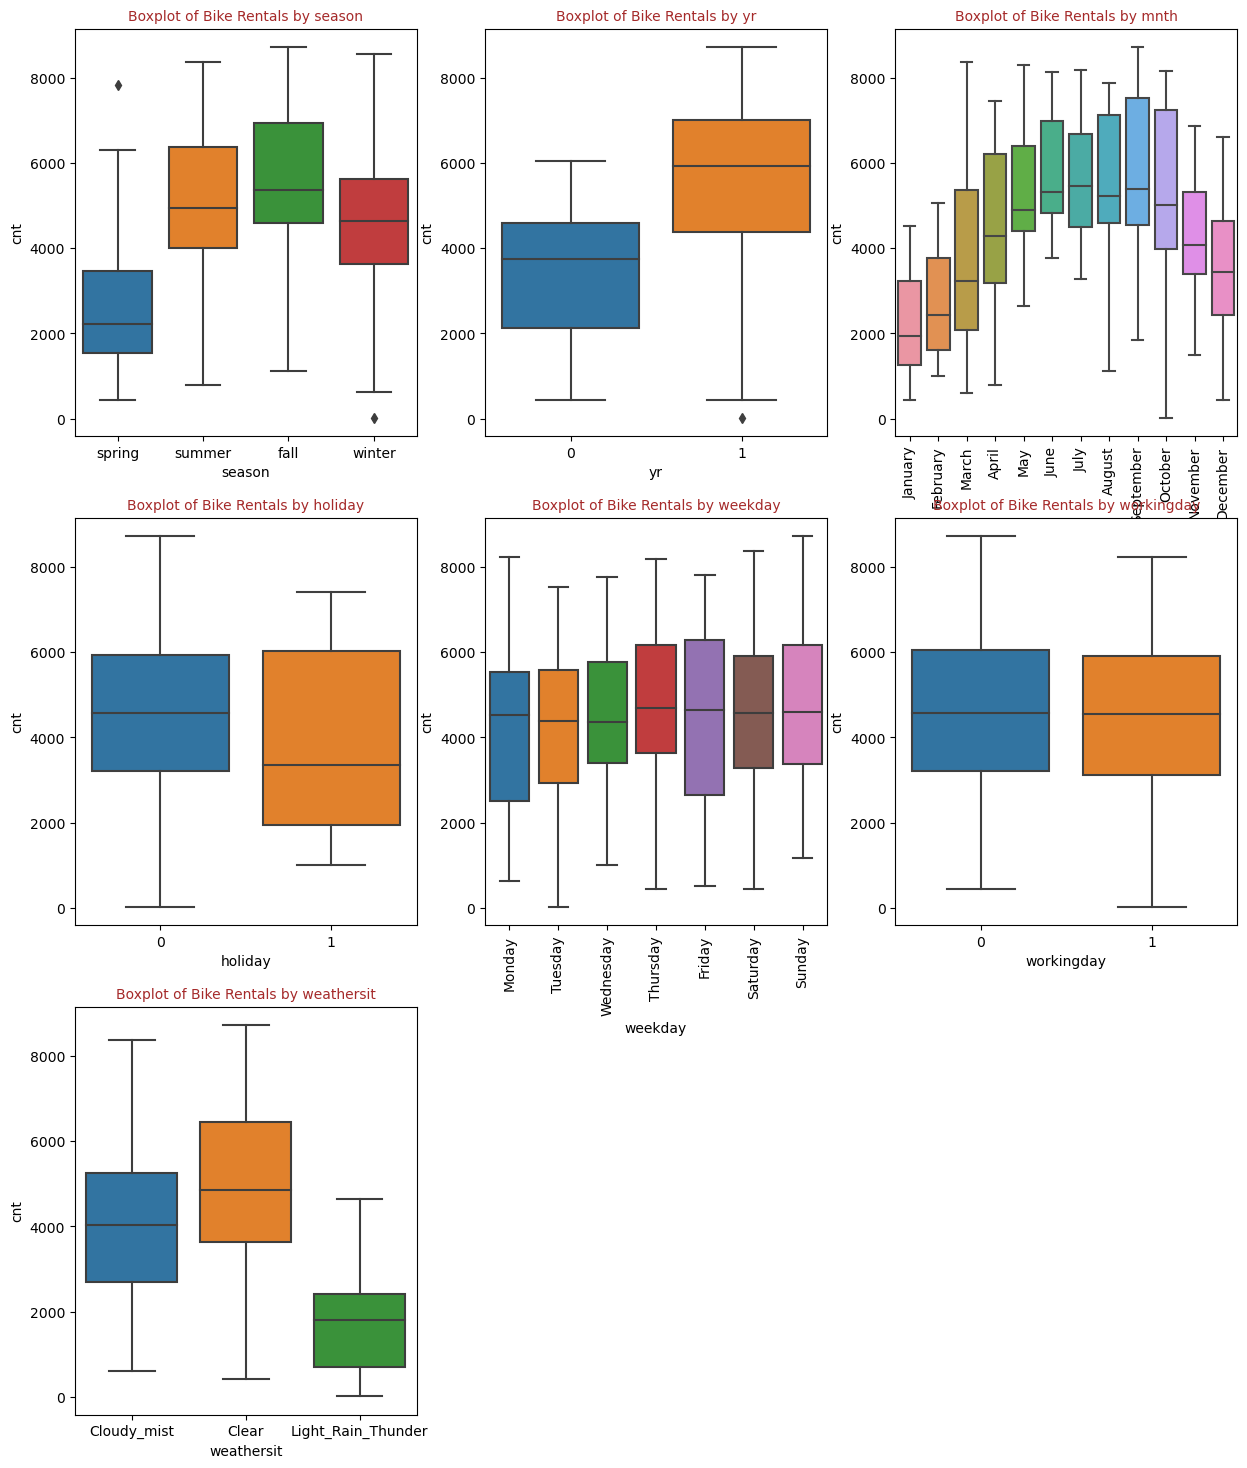

In [14]:
plt.figure(figsize=(15,18))
plt.subplot(3,3,1)
sns.boxplot(df,x='season',y='cnt')
plt.title('Boxplot of Bike Rentals by season',color = 'Brown',size = 10)
plt.subplot(3,3,2)
sns.boxplot(df,x='yr',y='cnt')
plt.title('Boxplot of Bike Rentals by yr',color = 'Brown',size = 10)
plt.subplot(3,3,3)
sns.boxplot(df,x='mnth',y='cnt')
plt.title('Boxplot of Bike Rentals by mnth',color = 'Brown',size = 10)
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.boxplot(df,x='holiday',y='cnt')
plt.title('Boxplot of Bike Rentals by holiday',color = 'Brown',size = 10)
plt.subplot(3,3,5)
sns.boxplot(df,x='weekday',y='cnt')
plt.title('Boxplot of Bike Rentals by weekday',color = 'Brown',size = 10)
plt.xticks(rotation=90)
plt.subplot(3,3,6)
sns.boxplot(df,x='workingday',y='cnt')
plt.title('Boxplot of Bike Rentals by workingday',color = 'Brown',size = 10)
plt.subplot(3,3,7)
sns.boxplot(df,x='weathersit',y='cnt')
plt.title('Boxplot of Bike Rentals by weathersit',color = 'Brown',size = 10)

#### 1. Seasonal Analysis:
    -Fall has the highest average rentals, followed closely by summer.
    
#### 2. Year-wise Rentals:
    -2019 sees a notable increase with a median rise of approximately 2000 rentals compared to 2018.
    
#### 3. Monthly Trend:
    -September tops the monthly rental count, with surrounding months showing substantial demand.
    -The trend aligns with seasonal patterns, indicating a correlation between rentals and seasons.
    
#### 4. Holiday vs. Working Days:
    -Holidays generally result in lower rental counts compared to working days.
    -Holidays exhibit greater variability in rental demand.
    
#### 5. Weekday Analysis:
    -Overall, no significant difference in rentals across weekdays is observed.
    -Thursdays and Sundays stand out with higher variability in rental counts compared to other weekdays.

#### Checking outlier In Spring as we saw in boxplot. Median is around 2000 and 7000> seems like an outlier so we can drop this one row

In [15]:
df.shape

(730, 11)

In [16]:
df.drop(df[(df.season=='spring')&(df.cnt>7000)].index,inplace=True)

In [17]:
df.shape

(729, 11)

In [18]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Cloudy_mist,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Cloudy_mist,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


#### Understanding Correlation among categorical and numerical values

<Axes: >

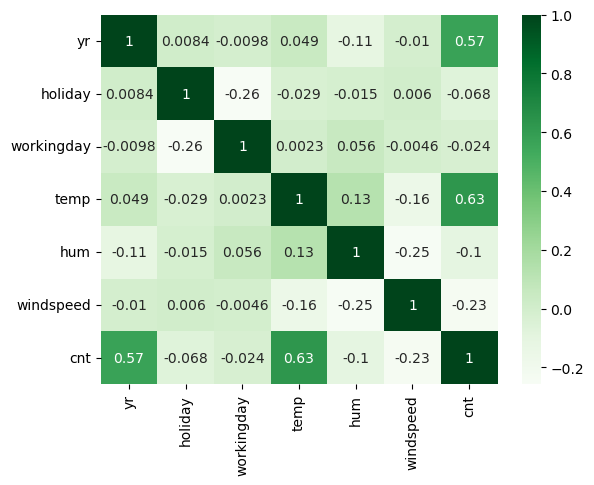

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')

#### Highest correlation with cnt is seen in temp followed by yr.

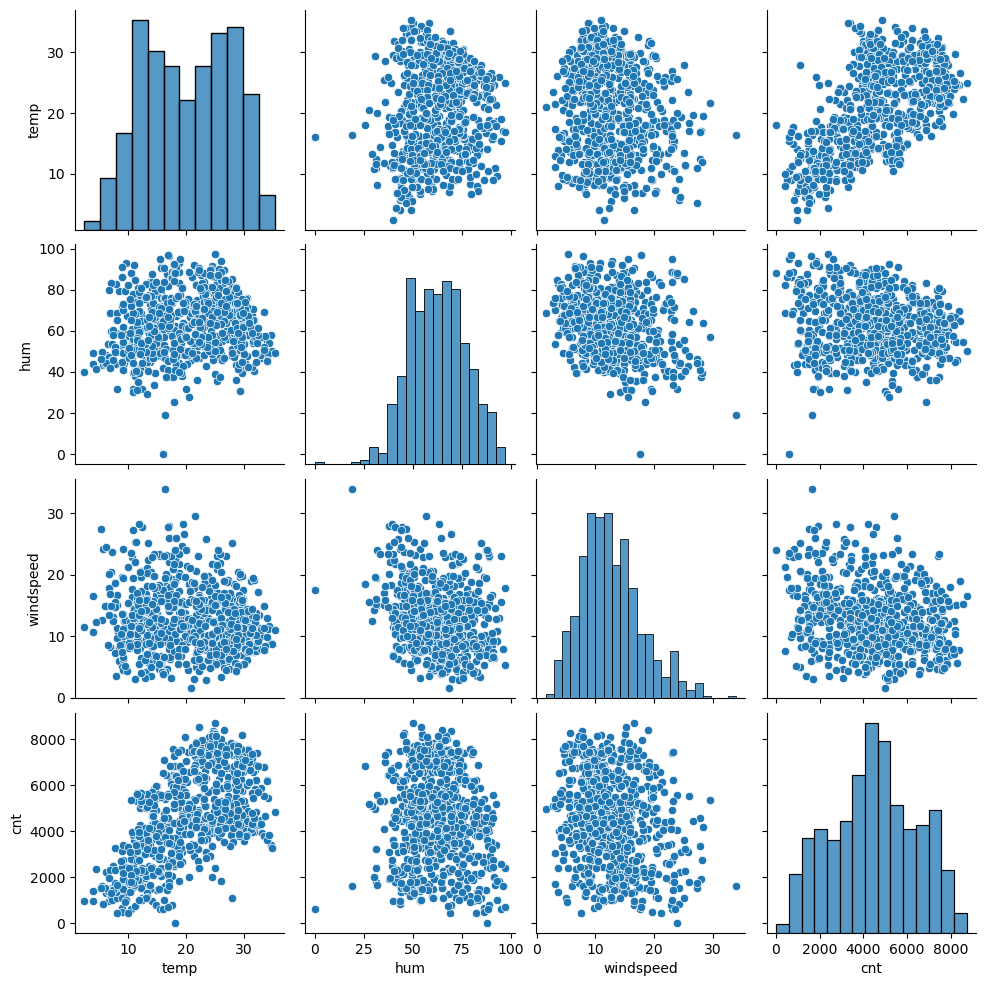

In [177]:
sns.pairplot(df[['temp','hum','windspeed','cnt']])

### Step 3: Data Preparation
<hr/>
 Let’s Prepare data using pd.get_dummies

In [21]:
season_dum = pd.get_dummies(df['season'],drop_first=True)
mnth_dum = pd.get_dummies(df['mnth'],drop_first=True)
weekday_dum = pd.get_dummies(df['weekday'],drop_first=True)
weathersit_dum = pd.get_dummies(df['weathersit'],drop_first=True)

In [22]:
# Adding indicator variable columns to the dataset . Dropping original columns
df = pd.concat([df,season_dum,mnth_dum,weekday_dum,weathersit_dum],axis=1)

In [26]:
df.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [27]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df.shape

(729, 29)

### Step 4: Splitting the Data into Training and Testing Sets

In [30]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

In [31]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [32]:
df_train.shape

(510, 29)

In [34]:
df_test.shape

(219, 29)

#### Rescaling the Features

In [35]:
# Import the MinMaxScaler class from scikit-learn for feature scaling
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
626,1,0,1,22.652500,53.6667,14.416725,7591,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
363,0,0,0,12.778347,63.6667,9.000579,2999,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
425,1,0,0,14.486653,65.7083,9.708568,3194,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [39]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_var = ['temp','hum','windspeed']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [40]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
626,1,0,1,0.614763,0.553027,0.371638,7591,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
363,0,0,0,0.314673,0.656076,0.197852,2999,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
425,1,0,0,0.366591,0.677114,0.220569,3194,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [41]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.509804,0.021569,0.709804,0.539048,0.648381,0.315400,4517.092157,0.241176,0.245098,0.24902,0.092157,0.094118,0.066667,0.082353,0.078431,0.076471,0.096078,0.088235,0.082353,0.082353,0.086275,0.156863,0.135294,0.135294,0.141176,0.141176,0.133333,0.343137,0.027451
std,0.500395,0.145413,0.454298,0.227284,0.145999,0.170073,1968.461206,0.428217,0.430568,0.43287,0.289531,0.292279,0.249689,0.275172,0.269113,0.266010,0.294988,0.283915,0.275172,0.275172,0.281045,0.364028,0.342373,0.342373,0.348545,0.348545,0.340268,0.475223,0.163554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336738,0.538643,0.195527,3132.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545711,0.649205,0.285417,4540.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.739627,0.755904,0.406426,6111.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


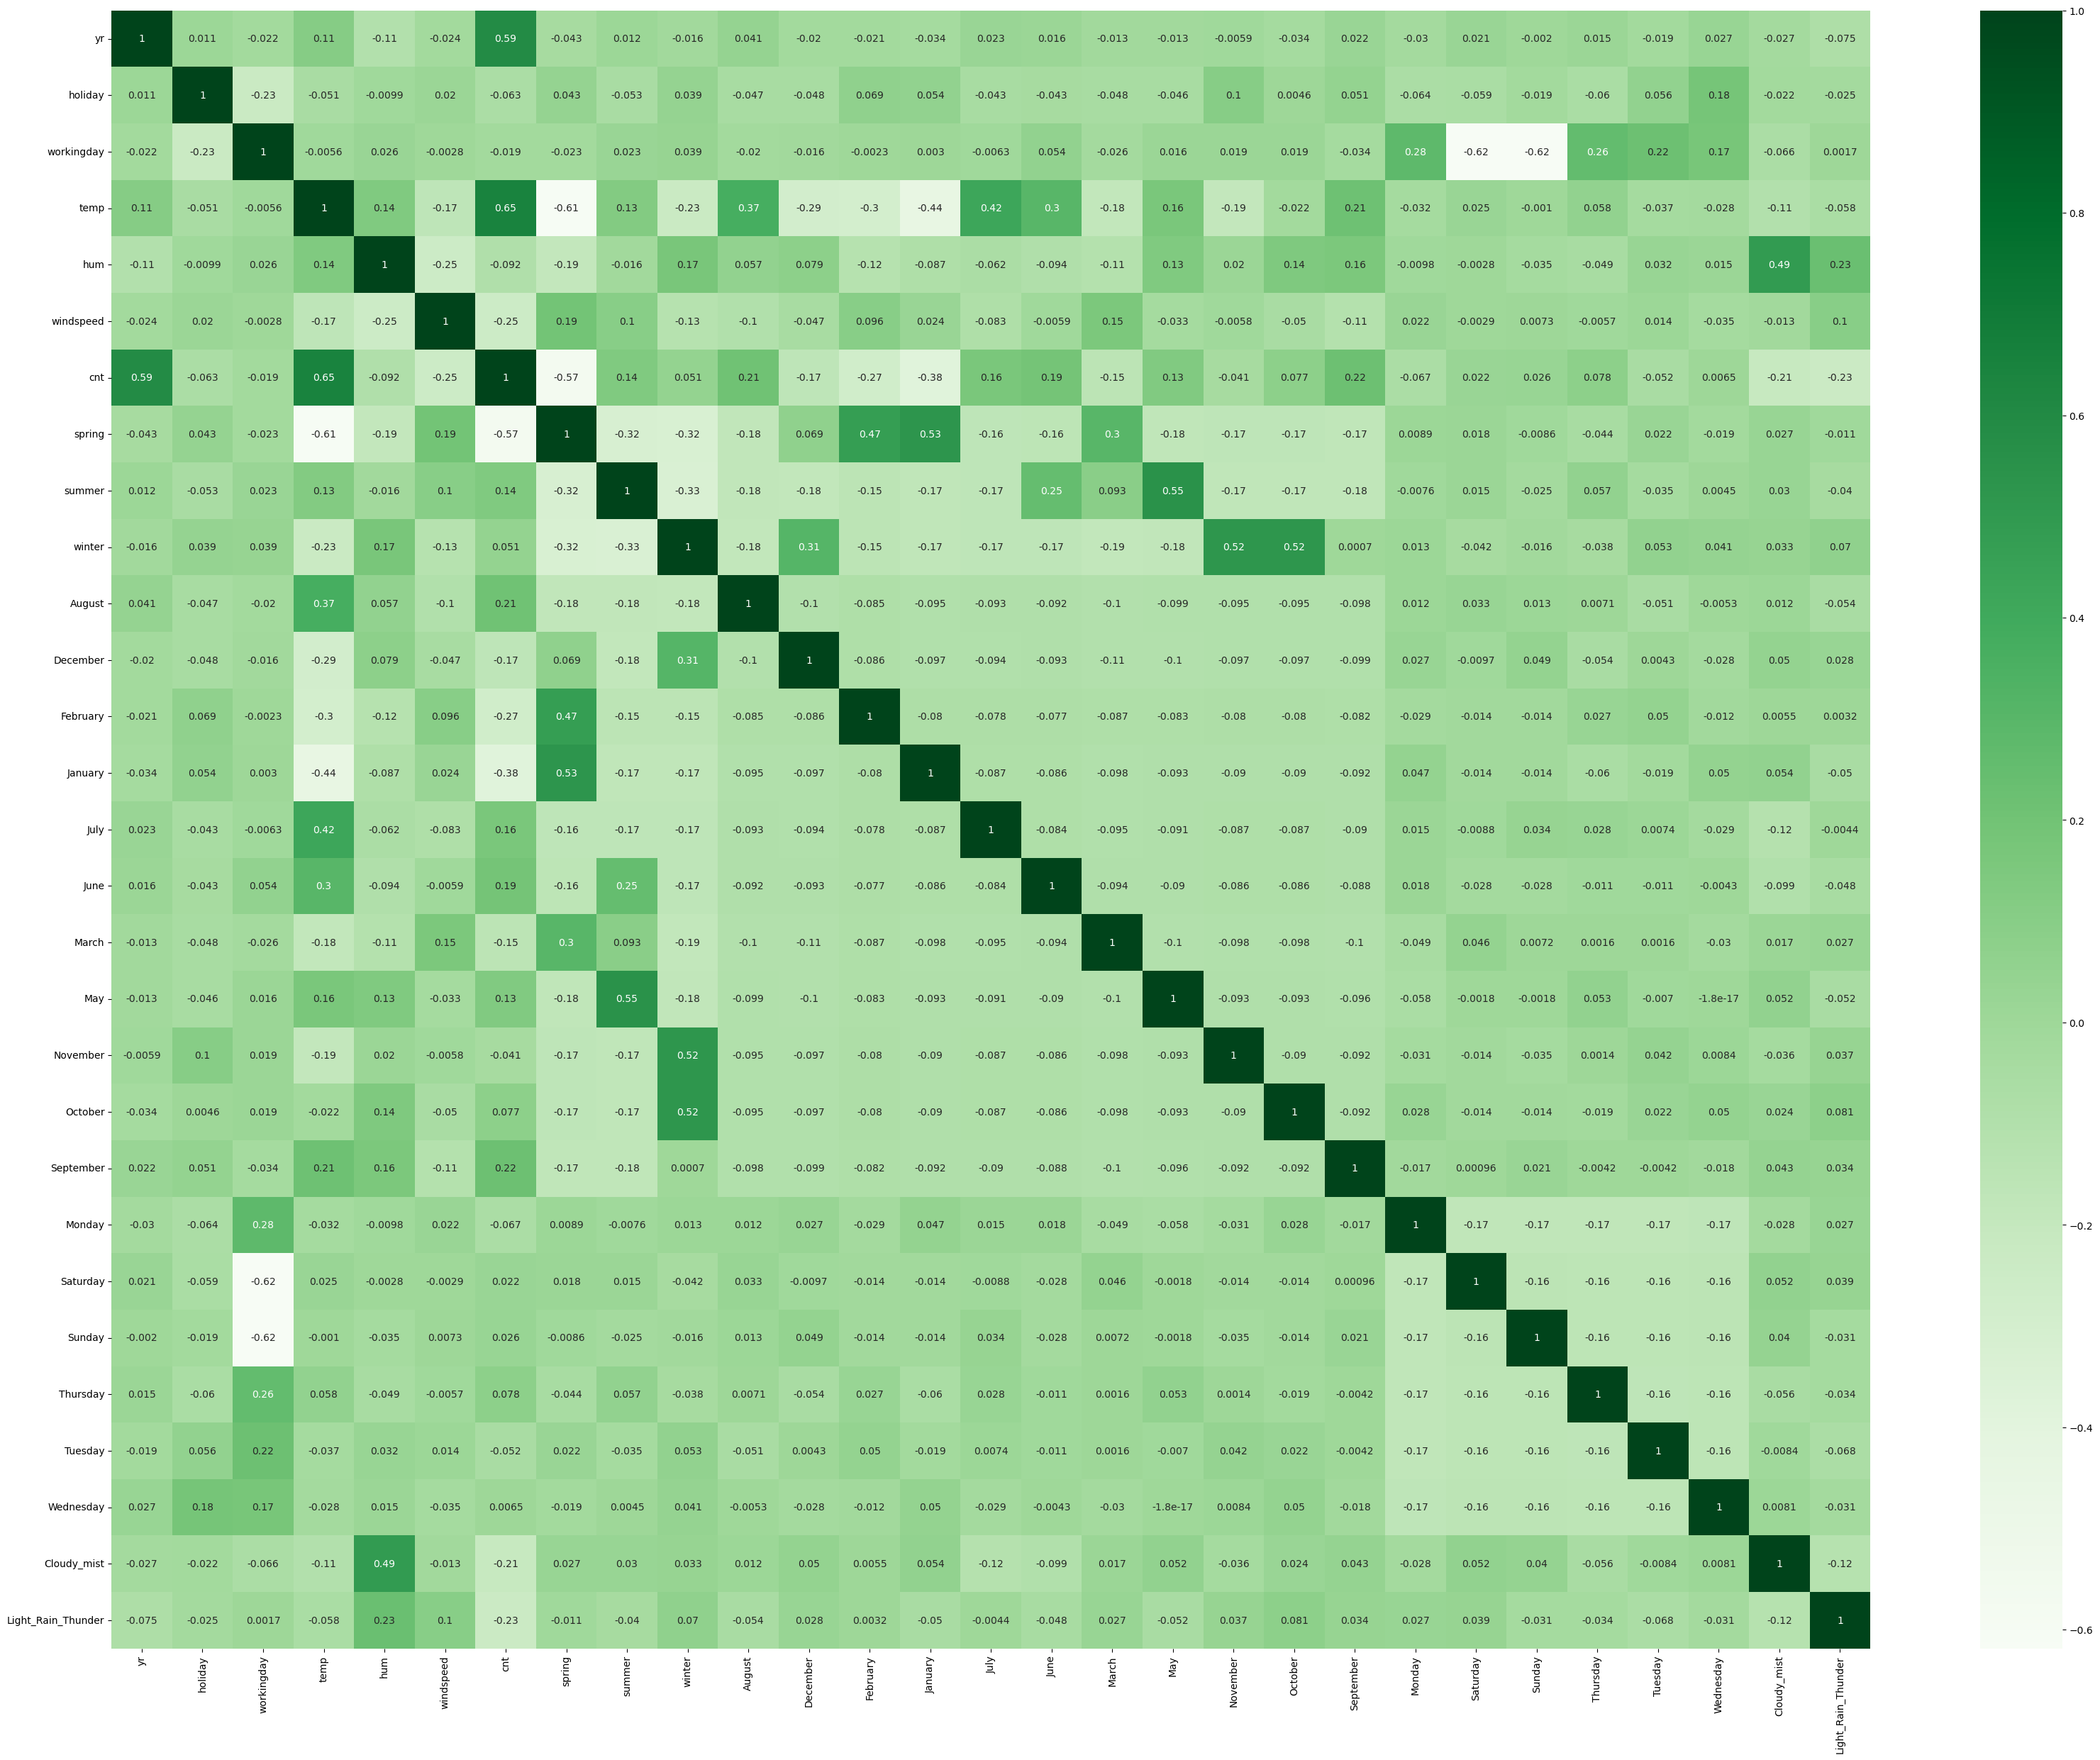

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

#### From above we can also figure out how certain variables such as CNT, specifics Month are higly correlated. Lets build the model and check it out

### Dividing into X and Y sets for the model building


In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

In [44]:
y_train

626    7591
363    2999
425    3194
728    1796
482    4220
       ... 
579    7175
53     1917
350    2739
79     2077
521    7055
Name: cnt, Length: 510, dtype: int64

### Step 5: Building a linear model


#### Model 1: Linear regression


In [45]:
import statsmodels.api as sm


In [51]:
# Add a constant column to the DataFrame 'x_train' containing only the "temp" feature
X_train_sm = sm.add_constant(X_train[["temp"]])
lr = sm.OLS(y_train,X_train_sm).fit()

In [52]:
lr.params

const    1479.084302
temp     5635.880972
dtype: float64

In [53]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     373.1
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           9.67e-63
Time:                        05:07:29   Log-Likelihood:                -4451.1
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1479.0843    170.662      8.667      0.000    1143.795    1814.374
temp        5635.8810    291.770     19.316      0.000    5062.656    6209.106
==============================================================================
Omnibus:                       10.471   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                6.662
Skew:                           0.118   Prob(JB):                       0.0358
Kurtosis:                       2.492   Cond. No.                         5.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding all variable
The R-squared value obtained is 0.423. Since we have so many variables, we can clearly do better than this. So let us add some other variables to identify

In [55]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

#### Model 2: Multiiple linear regression model using all variables

In [56]:
X_train_sm = sm.add_constant(X_train)
mlr2 = sm.OLS(y_train,X_train_sm).fit()

In [57]:
mlr2.params

const                 2309.801461
yr                    1989.541251
holiday                 36.034037
workingday             687.407525
temp                  3858.627483
hum                  -1550.733675
windspeed            -1400.329449
spring                -543.358327
summer                 303.299176
winter                 879.109163
August                 192.152873
December              -331.792185
February              -242.216125
January               -390.720691
July                  -329.378819
June                    82.765046
March                   73.692385
May                    319.871667
November              -364.664031
October                165.542027
September              775.447312
Monday                -196.645605
Saturday               721.907368
Sunday                 766.477924
Thursday                36.860826
Tuesday               -192.138758
Wednesday              -49.776395
Cloudy_mist           -535.468660
Light_Rain_Thunder   -1946.476054
dtype: float64

In [58]:
mlr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          8.20e-186
Time:                        05:10:02   Log-Likelihood:                -4089.7
No. Observations:                 510   AIC:                             8237.
Df Residuals:                     481   BIC:                             8360.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2309.8015    903.790      2.556      0.011     533.938    4085.665
yr                  1989.5413     68.881     28.884      0.000    1854.196    2124.886
holiday               36.0340    775.744      0.046      0.963   -1488.232    1560.300
workingday           687.4075    814.235      0.844      0.399    -912.490    2287.305
temp                3858.6275    393.390      9.809      0.000    3085.652    4631.603
hum                -1550.7337    331.061     -4.684      0.000   -2201.238    -900.229
windspeed          -1400.3294    218.851     -6.399      0.000   -1830.351    -970.308
spring              -543.3583    246.696     -2.203      0.028   -1028.093     -58.623
summer               303.2992    218.195      1.390      0.165    -125.433     732.032
winter               879.1092    223.556      3.932      0.000     439.843    1318.375
August               192.1529    286.111      0.672      0.502    -370.029     754.335
December            -331.7922    281.081     -1.180      0.238    -884.091     220.507
February            -242.2161    282.815     -0.856      0.392    -797.921     313.489
January             -390.7207    290.028     -1.347      0.179    -960.599     179.157
July                -329.3788    296.572     -1.111      0.267    -912.116     253.359
June                  82.7650    214.681      0.386      0.700    -339.063     504.593
March                 73.6924    211.423      0.349      0.728    -341.735     489.120
May                  319.8717    181.735      1.760      0.079     -37.220     676.963
November            -364.6640    305.757     -1.193      0.234    -965.449     236.120
October              165.5420    300.780      0.550      0.582    -425.463     756.548
September            775.4473    269.873      2.873      0.004     245.171    1305.723
Monday              -196.6456    121.346     -1.621      0.106    -435.080      41.789
Saturday             721.9074    822.347      0.878      0.380    -893.928    2337.743
Sunday               766.4779    812.437      0.943      0.346    -829.886    2362.842
Thursday              36.8608    124.495      0.296      0.767    -207.761     281.483
Tuesday             -192.1388    124.860     -1.539      0.125    -437.477      53.200
Wednesday            -49.7764    127.737     -0.390      0.697    -300.767     201.214
Cloudy_mist         -535.4687     90.348     -5.927      0.000    -712.994    -357.943
Light_Rain_Thunder -1946.4761    232.647     -8.367      0.000   -2403.605   -1489.347
==============================================================================
Omnibus:                       79.125   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.969
Skew:                          -0.828   Prob(JB):             

#### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,73.65
3,temp,44.50
4,hum,41.80
21,Saturday,14.26
22,Sunday,13.52
6,spring,12.71
8,winter,10.99
7,summer,9.75
17,November,6.71
9,August,6.60


#### Next step :
It can be seen some variables have very high VIF values and high p_value so its better to use RFE recursive feature elimination to decide the best variables

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [64]:
lm = LinearRegression()

In [65]:
lm.fit(X_train,y_train)

LinearRegression()

In [67]:
lm.coef_

array([ 1989.5412514 ,    36.03403704,   687.40752531,  3858.62748319,
       -1550.73367455, -1400.32944909,  -543.35832711,   303.29917596,
         879.10916292,   192.15287316,  -331.79218478,  -242.21612471,
        -390.72069125,  -329.37881866,    82.76504554,    73.69238548,
         319.87166738,  -364.66403087,   165.54202681,   775.44731222,
        -196.64560461,   721.90736847,   766.47792384,    36.86082551,
        -192.13875826,   -49.77639524,  -535.46865978, -1946.4760536 ])

In [68]:
lm.intercept_

2309.801461145453

In [70]:
rfe = RFE(lm,n_features_to_select=20)              
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
0,yr,True,1
22,Sunday,True,1
21,Saturday,True,1
20,Monday,True,1
19,September,True,1
17,November,True,1
16,May,True,1
26,Cloudy_mist,True,1
12,January,True,1
11,February,True,1


In [72]:
# selecting columns based on RFE
selected_features= X_train.columns[rfe.support_]
selected_features

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'February', 'January', 'July', 'May', 'November',
       'September', 'Monday', 'Saturday', 'Sunday', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [73]:
X_train_rfe = X_train[selected_features]
X_train_rfe.head()

,yr,workingday,temp,hum,windspeed,spring,summer,winter,December,February,January,July,May,November,September,Monday,Saturday,Sunday,Cloudy_mist,Light_Rain_Thunder
626,1,1,0.614763,0.553027,0.371638,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
363,0,0,0.314673,0.656076,0.197852,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
425,1,0,0.366591,0.677114,0.220569,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
728,1,1,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0


In [75]:
X_train_rfe.shape

(510, 20)

### Model 3: using RFE
Adding Selected variables to the model

In [76]:
X_train_sm = sm.add_constant(X_train_rfe)
mlr3 = sm.OLS(y_train,X_train_sm).fit()

In [77]:
mlr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     149.0
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          2.40e-193
Time:                        05:21:47   Log-Likelihood:                -4091.9
No. Observations:                 510   AIC:                             8226.
Df Residuals:                     489   BIC:                             8315.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2391.2036    407.503      5.868      0.000    1590.531    3191.876
yr                  1989.6410     68.300     29.131      0.000    1855.444    2123.838
workingday           692.6227    245.758      2.818      0.005     209.751    1175.494
temp                3921.4808    325.024     12.065      0.000    3282.865    4560.097
hum                -1565.6916    322.523     -4.855      0.000   -2199.394    -931.990
windspeed          -1423.4312    216.170     -6.585      0.000   -1848.168    -998.694
spring              -600.7352    186.158     -3.227      0.001    -966.504    -234.967
summer               193.5709    144.805      1.337      0.182     -90.946     478.088
winter               866.3248    148.355      5.840      0.000     574.834    1157.816
December            -454.4302    149.185     -3.046      0.002    -747.553    -161.308
February            -329.6156    183.252     -1.799      0.073    -689.674      30.443
January             -469.2654    184.713     -2.541      0.011    -832.195    -106.336
July                -508.2517    152.801     -3.326      0.001    -808.480    -208.024
May                  273.8928    147.077      1.862      0.063     -15.088     562.874
November            -502.2371    161.223     -3.115      0.002    -819.012    -185.462
September            613.9647    137.983      4.450      0.000     342.851     885.078
Monday              -145.1971     96.133     -1.510      0.132    -334.083      43.688
Saturday             775.8846    258.954      2.996      0.003     267.085    1284.685
Sunday               822.9480    259.259      3.174      0.002     313.549    1332.347
Cloudy_mist         -529.8620     89.647     -5.911      0.000    -706.003    -353.721
Light_Rain_Thunder -1907.0674    229.604     -8.306      0.000   -2358.199   -1455.936
==============================================================================
Omnibus:                       77.280   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.378
Skew:                          -0.820   Prob(JB):                     2.74e-37
Kurtosis:                       5.288   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.51
2,temp,23.54
1,workingday,23.45
5,spring,6.18
16,Saturday,5.23
17,Sunday,5.06
4,windspeed,4.95
7,winter,4.22
6,summer,3.77
18,Cloudy_mist,2.41


### Model 4:
Removing the variable hum based on its Very High 'VIF' value.

In [79]:
X_train_rfe.drop('hum',axis=1,inplace=True)

In [80]:
X_train_sm = sm.add_constant(X_train_rfe)
mlr4 = sm.OLS(y_train,X_train_sm).fit()
mlr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.7
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          1.80e-189
Time:                        05:25:02   Log-Likelihood:                -4103.9
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     490   BIC:                             8333.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1593.2510    381.370      4.178      0.000     843.928    2342.574
yr                  2034.0620     69.225     29.383      0.000    1898.048    2170.077
workingday           727.9014    251.243      2.897      0.004     234.254    1221.549
temp                3553.4151    323.253     10.993      0.000    2918.282    4188.548
windspeed          -1147.2290    213.296     -5.379      0.000   -1566.317    -728.140
spring              -663.7573    189.933     -3.495      0.001   -1036.941    -290.574
summer               171.6311    148.030      1.159      0.247    -119.220     462.482
winter               757.1815    149.980      5.049      0.000     462.499    1051.864
December            -531.9245    151.705     -3.506      0.000    -829.998    -233.851
February            -338.0530    187.416     -1.804      0.072    -706.291      30.185
January             -524.6827    188.558     -2.783      0.006    -895.164    -154.201
July                -452.3403    155.836     -2.903      0.004    -758.529    -146.152
May                  182.5114    149.189      1.223      0.222    -110.617     475.640
November            -534.5324    164.753     -3.244      0.001    -858.242    -210.823
September            551.6292    140.512      3.926      0.000     275.548     827.710
Monday              -142.2969     98.320     -1.447      0.148    -335.478      50.884
Saturday             844.4777    264.455      3.193      0.001     324.871    1364.084
Sunday               890.3057    264.781      3.362      0.001     370.059    1410.553
Cloudy_mist         -786.9694     73.977    -10.638      0.000    -932.320    -641.619
Light_Rain_Thunder -2356.7072    214.876    -10.968      0.000   -2778.899   -1934.516
==============================================================================
Omnibus:                       76.331   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.088
Skew:                          -0.815   Prob(JB):                     2.34e-36
Kurtosis:                       5.250   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,21.18
2,temp,15.89
4,spring,5.67
15,Saturday,4.89
3,windspeed,4.81
16,Sunday,4.68
6,winter,3.68
5,summer,3.54
9,January,2.23
0,yr,2.09


### Model 5:
Removing the variable workingday based on its Very High 'VIF' value.

In [82]:
X_train_rfe.drop('workingday',axis=1,inplace=True)

In [83]:
X_train_sm = sm.add_constant(X_train_rfe)
mlr5 = sm.OLS(y_train,X_train_sm).fit()
mlr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     154.2
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          8.93e-189
Time:                        05:26:37   Log-Likelihood:                -4108.2
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     491   BIC:                             8335.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2333.5111    285.246      8.181      0.000    1773.057    2893.965
yr                  2029.8530     69.729     29.111      0.000    1892.849    2166.857
temp                3518.9303    325.457     10.812      0.000    2879.471    4158.390
windspeed          -1148.2459    214.896     -5.343      0.000   -1570.475    -726.016
spring              -672.5863    191.333     -3.515      0.000   -1048.519    -296.654
summer               160.0918    149.086      1.074      0.283    -132.833     453.017
winter               747.7870    151.069      4.950      0.000     450.965    1044.609
December            -534.4189    152.841     -3.497      0.001    -834.722    -234.116
February            -381.6209    188.213     -2.028      0.043    -751.423     -11.819
January             -565.3047    189.446     -2.984      0.003    -937.530    -193.080
July                -443.9905    156.978     -2.828      0.005    -752.421    -135.560
May                  197.3820    150.219      1.314      0.189     -97.769     492.533
November            -565.2241    165.645     -3.412      0.001    -890.686    -239.763
September            523.4761    141.227      3.707      0.000     245.991     800.961
Monday              -118.6517     98.716     -1.202      0.230    -312.609      75.306
Saturday             139.8853    104.661      1.337      0.182     -65.753     345.524
Sunday               184.8228    104.772      1.764      0.078     -21.035     390.680
Cloudy_mist         -784.1691     74.525    -10.522      0.000    -930.597    -637.742
Light_Rain_Thunder -2344.3690    216.445    -10.831      0.000   -2769.642   -1919.096
==============================================================================
Omnibus:                       85.930   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.631
Skew:                          -0.882   Prob(JB):                     7.38e-44
Kurtosis:                       5.497   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.69
2,windspeed,4.65
3,spring,4.35
5,winter,2.88
4,summer,2.81
8,January,2.12
0,yr,2.09
7,February,1.87
11,November,1.75
10,May,1.63


### Model 6:
Removing the variable Summer based on its Very High 'p' value.

In [85]:
X_train_rfe.drop('summer',axis=1,inplace=True)

In [86]:
X_train_sm = sm.add_constant(X_train_rfe)
mlr6 = sm.OLS(y_train,X_train_sm).fit()
mlr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     163.2
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          1.22e-189
Time:                        05:31:54   Log-Likelihood:                -4108.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     492   BIC:                             8330.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2524.6198    222.951     11.324      0.000    2086.566    2962.674
yr                  2034.3330     69.615     29.223      0.000    1897.554    2171.112
temp                3345.2394    282.460     11.843      0.000    2790.262    3900.216
windspeed          -1124.9325    213.830     -5.261      0.000   -1545.065    -704.800
spring              -797.0856    152.228     -5.236      0.000   -1096.183    -497.989
winter               652.4986    122.279      5.336      0.000     412.244     892.753
December            -569.5097    149.330     -3.814      0.000    -862.913    -276.107
February            -408.0234    186.629     -2.186      0.029    -774.711     -41.336
January             -605.3451    185.769     -3.259      0.001    -970.344    -240.346
July                -492.4946    150.362     -3.275      0.001    -787.925    -197.064
May                  272.6538    132.882      2.052      0.041      11.568     533.739
November            -600.9076    162.303     -3.702      0.000    -919.801    -282.014
September            470.4909    132.348      3.555      0.000     210.454     730.528
Monday              -117.3888     98.724     -1.189      0.235    -311.362      76.584
Saturday             141.2625    104.669      1.350      0.178     -64.391     346.917
Sunday               178.7332    104.635      1.708      0.088     -26.853     384.320
Cloudy_mist         -785.3637     74.528    -10.538      0.000    -931.797    -638.930
Light_Rain_Thunder -2353.2098    216.322    -10.878      0.000   -2778.239   -1928.181
==============================================================================
Omnibus:                       87.144   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.594
Skew:                          -0.883   Prob(JB):                     8.35e-46
Kurtosis:                       5.579   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.47
2,windspeed,4.06
3,spring,3.85
4,winter,2.59
7,January,2.12
0,yr,2.07
6,February,1.87
10,November,1.75
5,December,1.62
15,Cloudy_mist,1.56


### Model 7:
Removing the variable Monday based on its Very High 'p' value.

In [89]:
X_train_rfe.drop('Monday',axis=1,inplace=True)

In [90]:
X_train_sm = sm.add_constant(X_train_rfe)
mlr7 = sm.OLS(y_train,X_train_sm).fit()
mlr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          1.84e-190
Time:                        05:35:06   Log-Likelihood:                -4109.6
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     493   BIC:                             8325.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2492.3537    221.387     11.258      0.000    2057.376    2927.331
yr                  2036.1883     69.627     29.244      0.000    1899.387    2172.990
temp                3354.6859    282.467     11.876      0.000    2799.698    3909.673
windspeed          -1130.3019    213.872     -5.285      0.000   -1550.515    -710.089
spring              -792.5259    152.244     -5.206      0.000   -1091.652    -493.400
winter               652.7527    122.331      5.336      0.000     412.399     893.106
December            -571.4869    149.383     -3.826      0.000    -864.993    -277.980
February            -401.7838    186.633     -2.153      0.032    -768.479     -35.089
January             -610.1706    185.803     -3.284      0.001    -975.234    -245.108
July                -496.1329    150.394     -3.299      0.001    -791.625    -200.641
May                  281.8574    132.712      2.124      0.034      21.107     542.608
November            -591.2494    162.168     -3.646      0.000    -909.875    -272.624
September            472.8798    132.388      3.572      0.000     212.765     732.994
Saturday             166.3867    102.557      1.622      0.105     -35.117     367.890
Sunday               204.3508    102.436      1.995      0.047       3.086     405.616
Cloudy_mist         -784.5811     74.557    -10.523      0.000    -931.069    -638.093
Light_Rain_Thunder -2358.6574    216.364    -10.901      0.000   -2783.767   -1933.547
==============================================================================
Omnibus:                       88.776   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.723
Skew:                          -0.905   Prob(JB):                     7.83e-46
Kurtosis:                       5.550   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.33
2,windspeed,4.04
3,spring,3.84
4,winter,2.58
7,January,2.11
0,yr,2.07
6,February,1.87
10,November,1.75
5,December,1.62
14,Cloudy_mist,1.56


### Model 8:
Removing the variable Saturday based on its Very High 'p' value

In [92]:
X_train_rfe.drop('Saturday',axis=1,inplace=True)

In [93]:
X_train_sm = sm.add_constant(X_train_rfe)
mlr8 = sm.OLS(y_train,X_train_sm).fit()
mlr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     183.9
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          4.92e-191
Time:                        05:36:09   Log-Likelihood:                -4110.9
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2510.5265    221.468     11.336      0.000    2075.391    2945.662
yr                  2038.6007     69.726     29.237      0.000    1901.606    2175.596
temp                3366.0234    282.847     11.901      0.000    2810.293    3921.754
windspeed          -1135.5062    214.201     -5.301      0.000   -1556.363    -714.649
spring              -781.8525    152.352     -5.132      0.000   -1081.191    -482.514
winter               646.4106    122.470      5.278      0.000     405.785     887.037
December            -570.9952    149.630     -3.816      0.000    -864.984    -277.006
February            -413.9293    186.791     -2.216      0.027    -780.932     -46.927
January             -621.4496    185.979     -3.342      0.001    -986.857    -256.042
July                -500.3624    150.620     -3.322      0.001    -796.296    -204.429
May                  278.6533    132.916      2.096      0.037      17.503     539.804
November            -588.0894    162.424     -3.621      0.000    -907.216    -268.962
September            470.9846    132.601      3.552      0.000     210.452     731.517
Sunday               178.0754    101.314      1.758      0.079     -20.985     377.136
Cloudy_mist         -776.0058     74.492    -10.417      0.000    -922.366    -629.646
Light_Rain_Thunder -2341.6841    216.468    -10.818      0.000   -2766.995   -1916.373
==============================================================================
Omnibus:                       88.478   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.699
Skew:                          -0.894   Prob(JB):                     1.07e-46
Kurtosis:                       5.601   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.22
2,windspeed,4.04
3,spring,3.82
4,winter,2.58
7,January,2.11
0,yr,2.07
6,February,1.87
10,November,1.75
5,December,1.62
13,Cloudy_mist,1.55


### Model 9:
Removing the variable Sunday based on its Very High 'p' value.

In [95]:
X_train_rfe.drop('Sunday',axis=1,inplace=True)

In [96]:
X_train_sm = sm.add_constant(X_train_rfe)
mlr9 = sm.OLS(y_train,X_train_sm).fit()
mlr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.0
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          1.60e-191
Time:                        05:37:24   Log-Likelihood:                -4112.5
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     495   BIC:                             8319.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2542.2863    221.195     11.493      0.000    2107.689    2976.883
yr                  2038.4984     69.873     29.175      0.000    1901.215    2175.782
temp                3348.7847    283.272     11.822      0.000    2792.220    3905.349
windspeed          -1130.2319    214.631     -5.266      0.000   -1551.933    -708.531
spring              -787.1354    152.644     -5.157      0.000   -1087.045    -487.226
winter               640.5645    122.683      5.221      0.000     399.521     881.608
December            -560.7810    149.832     -3.743      0.000    -855.166    -266.396
February            -417.6697    187.173     -2.231      0.026    -785.420     -49.919
January             -626.8350    186.346     -3.364      0.001    -992.962    -260.708
July                -487.7762    150.766     -3.235      0.001    -783.997    -191.555
May                  278.5623    133.196      2.091      0.037      16.863     540.262
November            -592.5407    162.747     -3.641      0.000    -912.300    -272.782
September            478.4565    132.813      3.602      0.000     217.510     739.403
Cloudy_mist         -771.4827     74.604    -10.341      0.000    -918.063    -624.902
Light_Rain_Thunder -2353.8453    216.813    -10.857      0.000   -2779.834   -1927.857
==============================================================================
Omnibus:                       83.560   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.205
Skew:                          -0.848   Prob(JB):                     5.54e-44
Kurtosis:                       5.549   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.19
2,windspeed,4.02
3,spring,3.82
4,winter,2.58
7,January,2.11
0,yr,2.07
6,February,1.87
10,November,1.75
5,December,1.61
12,Cloudy_mist,1.54


### Model 10:
Removing the variable May and February based on its Very High 'p' value.

In [98]:
X_train_rfe.drop(['February','May'],axis=1,inplace=True)

In [99]:
X_train_sm = sm.add_constant(X_train_rfe)
mlr10 = sm.OLS(y_train,X_train_sm).fit()
mlr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     224.5
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          7.52e-192
Time:                        05:39:49   Log-Likelihood:                -4117.3
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2508.0549    215.061     11.662      0.000    2085.515    2930.595
yr                  2032.5541     70.363     28.887      0.000    1894.309    2170.799
temp                3488.3533    278.408     12.530      0.000    2941.352    4035.354
windspeed          -1112.1216    215.265     -5.166      0.000   -1535.064    -689.179
spring             -1002.0997    134.189     -7.468      0.000   -1265.748    -738.452
winter               572.5792    120.456      4.753      0.000     335.913     809.245
December            -462.4063    143.131     -3.231      0.001    -743.623    -181.190
January             -412.9457    159.859     -2.583      0.010    -727.029     -98.862
July                -577.1365    148.312     -3.891      0.000    -868.531    -285.741
November            -550.6518    162.405     -3.391      0.001    -869.736    -231.567
September            427.3939    131.432      3.252      0.001     169.163     685.625
Cloudy_mist         -763.2317     75.052    -10.169      0.000    -910.689    -615.774
Light_Rain_Thunder -2350.7853    218.318    -10.768      0.000   -2779.726   -1921.845
==============================================================================
Omnibus:                       74.499   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.386
Skew:                          -0.799   Prob(JB):                     2.45e-35
Kurtosis:                       5.224   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.74
2,windspeed,4.02
4,winter,2.45
3,spring,2.32
0,yr,2.07
8,November,1.73
6,January,1.60
10,Cloudy_mist,1.53
5,December,1.49
7,July,1.37


### Model 11:
Removing the variable January based on its Very High 'p' value.

In [101]:
X_train_rfe.drop('January',axis=1,inplace=True)

In [102]:
X_train_sm = sm.add_constant(X_train_rfe)
mlr11 = sm.OLS(y_train,X_train_sm).fit()
mlr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     241.6
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          1.28e-191
Time:                        05:40:58   Log-Likelihood:                -4120.7
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     498   BIC:                             8316.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2349.7216    207.312     11.334      0.000    1942.408    2757.035
yr                  2030.2929     70.757     28.694      0.000    1891.274    2169.312
temp                3695.8589    268.081     13.786      0.000    3169.150    4222.568
windspeed          -1041.5648    214.738     -4.850      0.000   -1463.469    -619.660
spring             -1082.0269    131.315     -8.240      0.000   -1340.026    -824.028
winter               581.5041    121.090      4.802      0.000     343.593     819.415
December            -372.3484    139.609     -2.667      0.008    -646.643     -98.054
July                -616.1436    148.379     -4.153      0.000    -907.669    -324.618
November            -504.6424    162.342     -3.109      0.002    -823.602    -185.683
September            421.8712    132.161      3.192      0.002     162.209     681.533
Cloudy_mist         -766.6253     75.466    -10.159      0.000    -914.897    -618.354
Light_Rain_Thunder -2319.4878    219.220    -10.581      0.000   -2750.198   -1888.778
==============================================================================
Omnibus:                       69.093   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.043
Skew:                          -0.766   Prob(JB):                     3.89e-31
Kurtosis:                       5.061   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.71
2,windspeed,4.02
4,winter,2.42
0,yr,2.06
7,November,1.72
3,spring,1.69
9,Cloudy_mist,1.52
5,December,1.44
6,July,1.37
8,September,1.23


### Step 7: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [104]:
X_train_sm = sm.add_constant(X_train_rfe)
y_train_pred = mlr11.predict(X_train_sm)

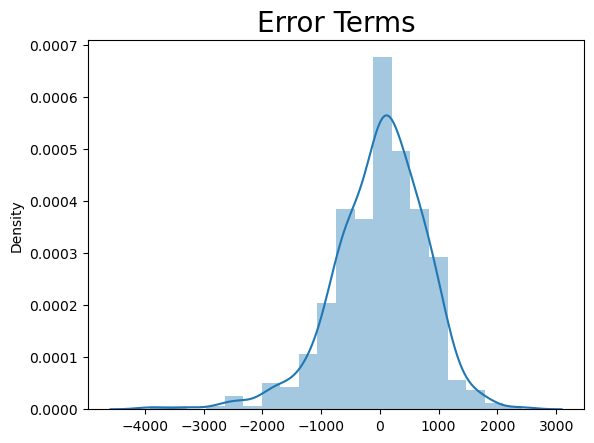

In [105]:
sns.distplot(y_train-y_train_pred,bins=20)
plt.title('Error Terms', fontsize = 20)
plt.show()

### Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it’s time to go ahead and make predictions using the final, i.e. Eleventh model (mlr11)

In [106]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = num_vars = ['temp','hum','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [132]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.045662,0.648402,0.554935,0.642466,0.326821,0.255708,0.269406,0.232877,0.068493,0.063927,0.100457,0.091324,0.100457,0.095890,0.054795,0.077626,0.082192,0.091324,0.073059,0.114155,0.159817,0.155251,0.146119,0.150685,0.164384,0.319635,0.031963
std,0.500513,0.209229,0.478563,0.230772,0.148689,0.158694,0.437258,0.444668,0.423633,0.253169,0.245183,0.301297,0.288730,0.301297,0.295115,0.228100,0.268194,0.275286,0.288730,0.260830,0.318728,0.367276,0.362974,0.354034,0.358561,0.371472,0.467403,0.176306
min,0.000000,0.000000,0.000000,0.046591,0.298841,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353611,0.531773,0.212553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547268,0.636324,0.311480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750790,0.741240,0.415786,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.815502,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [154]:
X_test.shape

(219, 28)

In [155]:
y_test.shape

(219,)

In [110]:
X_test_sm = sm.add_constant(X_test)

In [178]:
X_train_rfe.shape

(510, 11)

In [111]:
X_train_rfe.head()

,yr,temp,windspeed,spring,winter,December,July,November,September,Cloudy_mist,Light_Rain_Thunder
626,1,0.614763,0.371638,0,0,0,0,0,1,0,0
363,0,0.314673,0.197852,1,0,1,0,0,0,0,0
425,1,0.366591,0.220569,1,0,0,0,0,0,1,0
728,1,0.245101,0.663106,1,0,1,0,0,0,0,0
482,1,0.395666,0.188475,0,0,0,0,0,0,1,0


In [112]:
X_train_rfe.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'December', 'July',
       'November', 'September', 'Cloudy_mist', 'Light_Rain_Thunder'],
      dtype='object')

In [140]:
X_test_rfe = X_test[['yr', 'temp', 'windspeed', 'spring', 'winter', 'December', 'July',
       'November', 'September', 'Cloudy_mist', 'Light_Rain_Thunder']]

In [141]:
X_test_rfe.head()

,yr,temp,windspeed,spring,winter,December,July,November,September,Cloudy_mist,Light_Rain_Thunder
184,0,0.831783,0.084219,0,0,0,1,0,0,1,0
639,1,0.662528,0.133655,0,1,0,0,0,0,0,1
299,0,0.511964,0.334206,0,1,0,0,0,0,1,0
221,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,0,0,0,0,0,0,0


In [142]:
X_test_rfe.shape

(219, 11)

In [143]:
X_test_sm = sm.add_constant(X_test_rfe)

In [144]:
y_test_pred = mlr11.predict(X_test_sm)

In [145]:
y_test_pred.shape

(219,)

### Step 9: Model Evaluation
Let’s now plot the graph for actual versus predicted values.

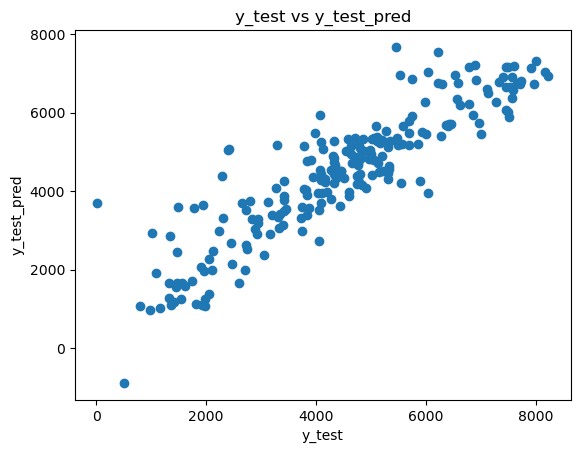

In [179]:
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

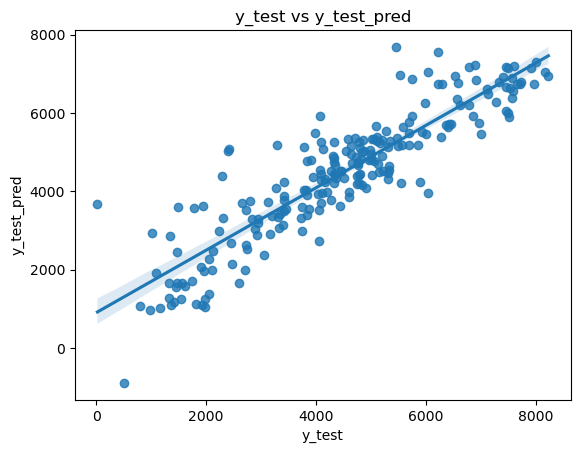

In [180]:
# Visualizing the fit on the test data
# plotting a Regression plot
sns.regplot(x=y_test,y=y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

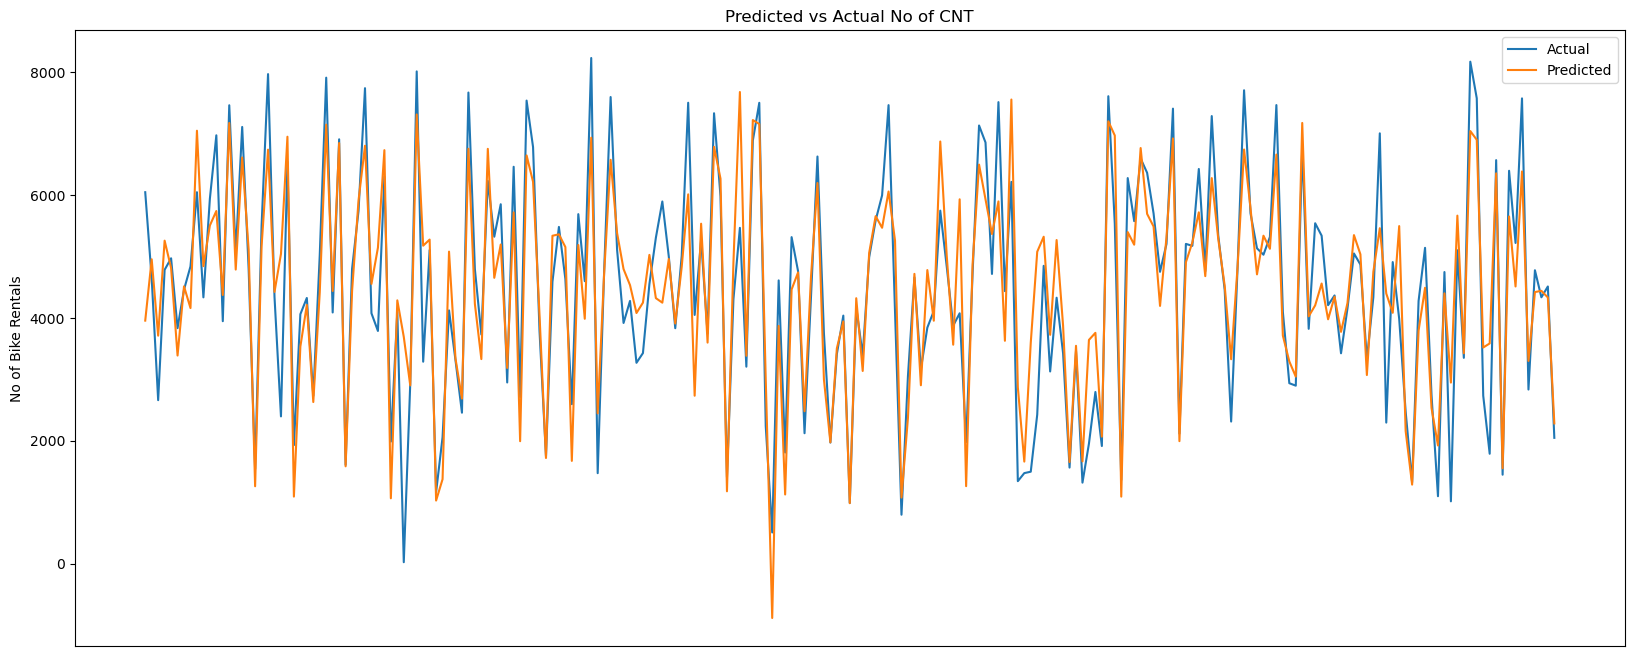

In [161]:
# Plotting Actual vs Predicted 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1, = ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of CNT');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

In [165]:
# CHECKING R SQUARED VALUE FOR TRAIN AND TEST DATA 
from sklearn.metrics import mean_squared_error,r2_score

In [170]:
rsquared_train = r2_score(y_train,y_train_pred)

In [171]:
rsquared_test = r2_score(y_test,y_test_pred)

In [173]:
mse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

In [174]:
mse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

In [175]:
print('R-squared for train data:',rsquared_train)
print('R-squared for test data:',rsquared_test)
print('Mean Squared Error for train data',round(mse_train,2))
print('Mean Squared Error for test data',round(mse_test,2))

R-squared for train data: 0.8421579512778632
R-squared for test data: 0.8005342146374483
Mean Squared Error for train data 781.29
Mean Squared Error for test data 825.78


#### Regression Equation: CNT = 2349.72 + 2030.29 * yr + 3695.86 * temp - 1041.56 * windspeed - 1082.03 * Spring + 581.50 * Winter - 372.35 * December - 616.14 * July - 504.64 * November + 421.87 * September - 766.63 * Cloudy_mist - 2319.49 * Light_Rain_Thunder